In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- The data is seperated by "," in the given dataset.

- ".head()" function (included in pandas library) returns first five observations of the dataset.

In [3]:
df.shape

(1000, 8)

- Dataset comprises of 1000 observations and 8 characteristics

- 5 of the characteristics are independent variables, whereas, the other 3 of them are given to be dependent on the rest of the 5 characteristics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Data has integer and object datatypes 

- No variable has null values

- The 3 different scores are discrete in nature (integer datatype) and the other 5 variables are categorical variables (object datatype)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- "describe()" function (included in pandas library) is a very useful function in getting various summary statistics

- For the given dataset,the mean of every score is almost near to the median value

- But there is a significant difference between the 75%ile value and the maximum values in each of the columns

- The above 2 observations give us the conclusion that there are some extreme values (outliers) in all the 3 different scores 

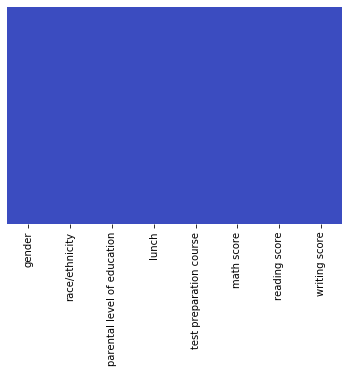

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'coolwarm')

- Dataset has no missing values

- If there were any, there would have been patches of other shade on this blue background

In [7]:
dummy_features=pd.get_dummies(df,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'])

- We applied a specific encoding scheme to the categorical values because we would like to see the dependence of the different scores on these categorical variables

In [8]:
df_new=pd.concat([dummy_features.iloc[:,3:],df[['math score','reading score','writing score']]],axis=1)
df_new.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


- We created a new dataframe consisting of the dummies produced in the above step

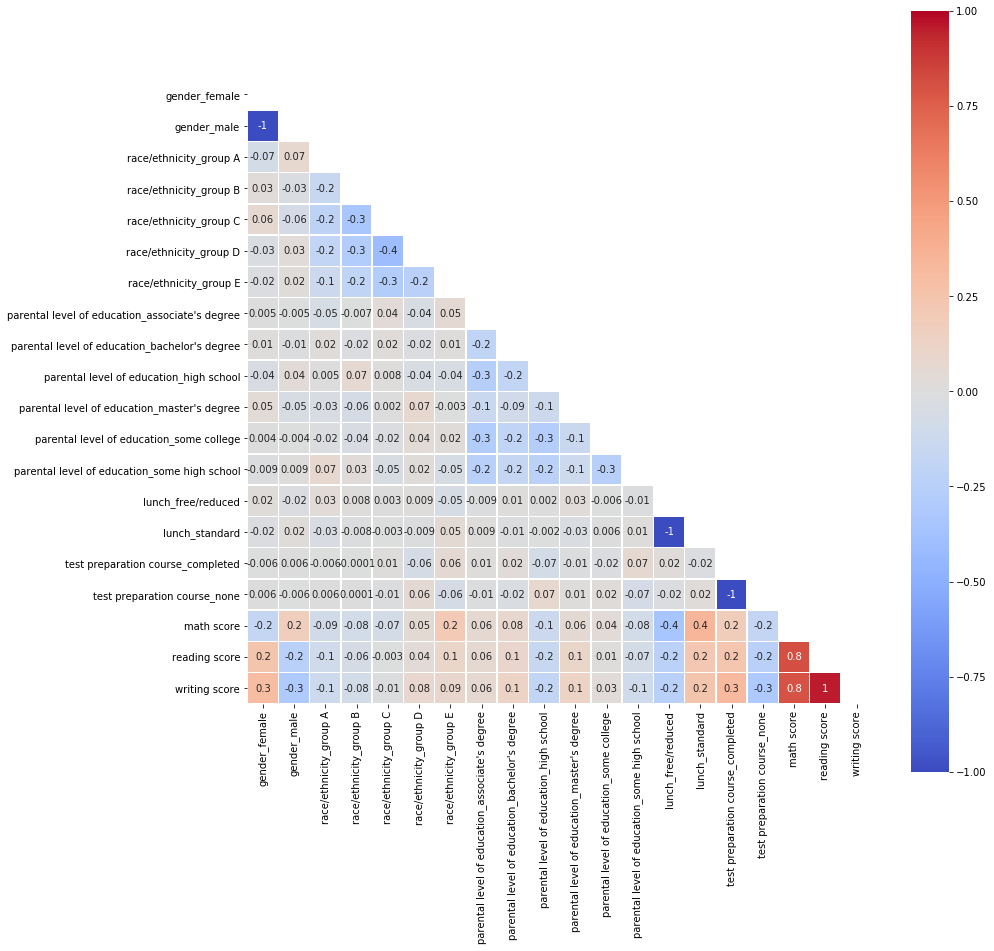

In [18]:
matrix = np.triu(df_new.corr())
plt.figure(figsize=(14,14))
sns.heatmap(df_new.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',square=True,linewidths=.5,mask=matrix)

- From this correlation matrix, we can conclude that "none of the variables have any significant correlation between them"

- We can also infer that "none of the variables have any significant correlation with the different scores also"

- We can also conclude that students scored very much similar marks in "reading" and "writing"

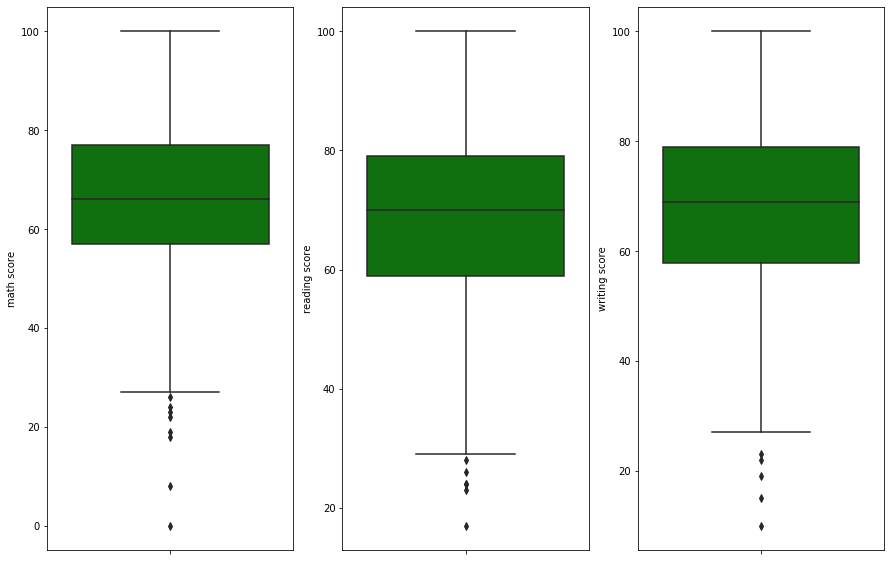

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y="math score", data=df,color='green')

plt.subplot(1,3,2)
sns.boxplot(y="reading score", data=df,color='green')

plt.subplot(1,3,3)
sns.boxplot(y="writing score", data=df,color='green')

- From these boxplots we can conclude that there are some "Outliers" in all the three different scores, in the lower strata

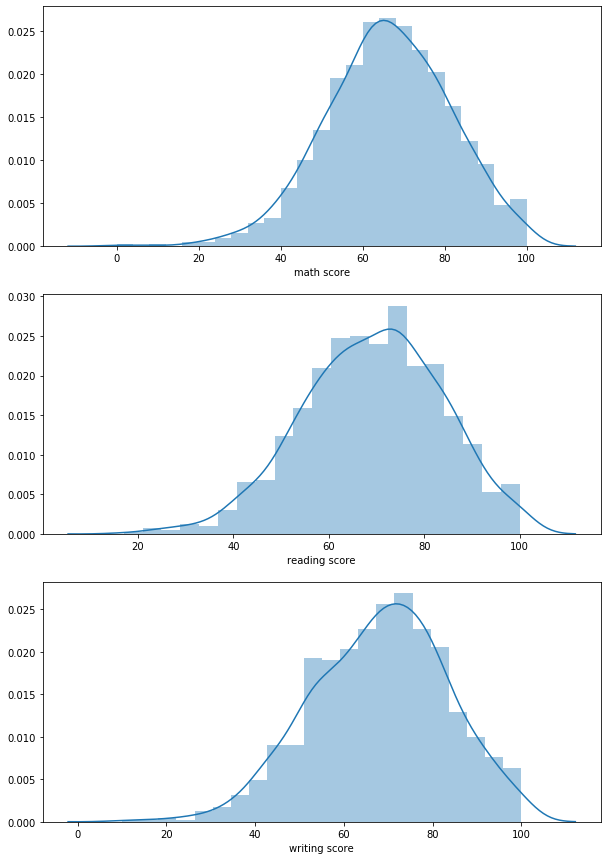

In [11]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.distplot(df["math score"],kde=True)

plt.subplot(3,1,2)
sns.distplot(df["reading score"],kde=True)

plt.subplot(3,1,3)
sns.distplot(df["writing score"],kde=True)

- 

- "mathscore" seems to be normally distributed, whereas, "reading score" and "writing score" appear to be "negatively skewed" a liitle

- In all the three scores, most of the students scored around 60-70 marks

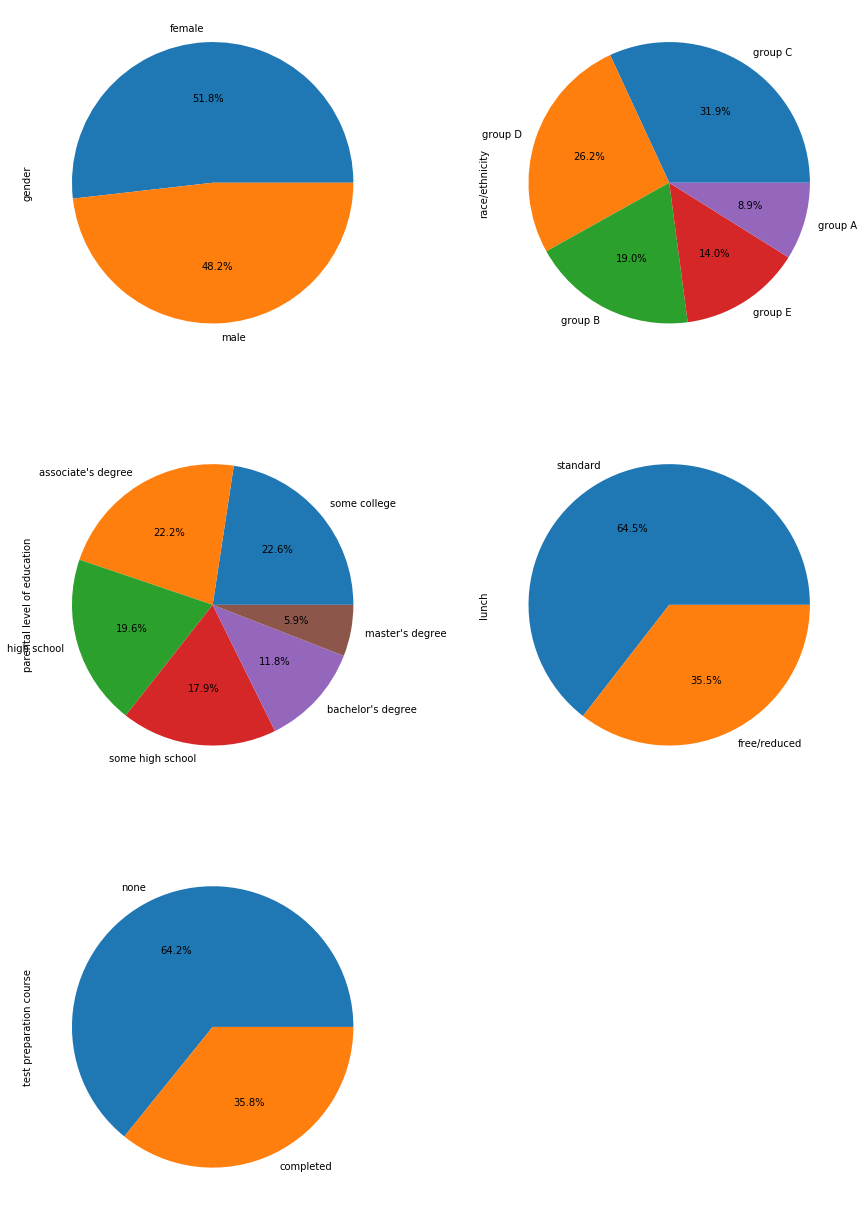

In [12]:
plt.figure(figsize=(15,22))
plt.subplot(3,2,1)
df.iloc[:,0].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,2)
df.iloc[:,1].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,3)
df.iloc[:,2].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,4)
df.iloc[:,3].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,5)
df.iloc[:,4].value_counts().plot.pie(autopct='%1.1f%%')

- Female to Male ratio is almost "1"

- Group C has the maximum chunk of students and Group A has the minimum chunk

- Majority of the parents have assciate's degree, some college,and high school education

- More than half of the students have standard lunch (64.5%)

- More than half of the students didn't complete their test preparation course

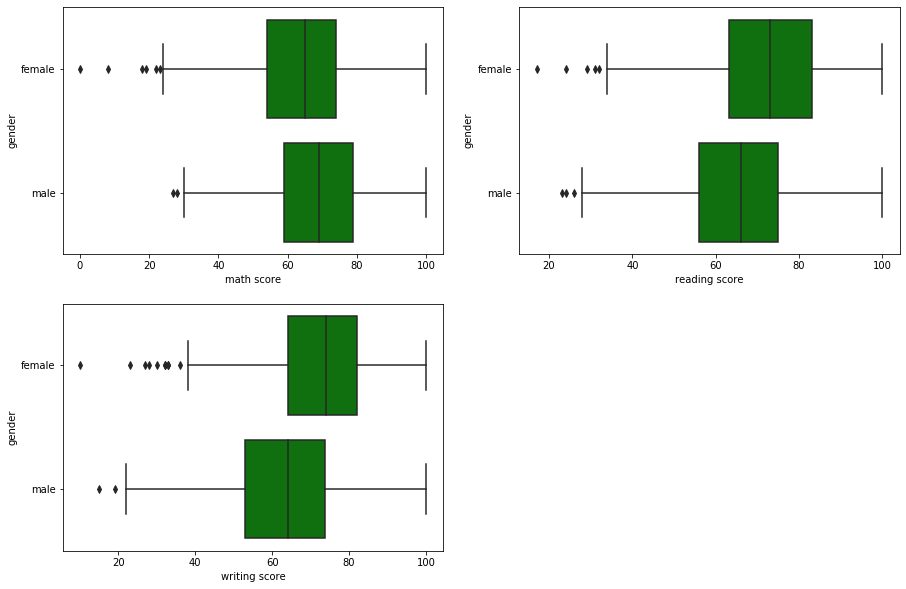

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="gender", data=df,color='green')

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="gender", data=df,color='green')

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="gender", data=df,color='green')

## mathscore
- > Boys outperformed girls.
- > The minimum mark is scored by the girls and also there are a couple of boys and girls who have performed extremely poor

## readingscore
- > Girls outperformed boys.
- > The minimum mark is scored by the girls and also there are a couple of boys and girls who have performed extremely poor

## writingscore
- > Girls outperformed boys.
- > The minimum mark is scored by the girls and also there are a couple of boys and girls who have performed poor

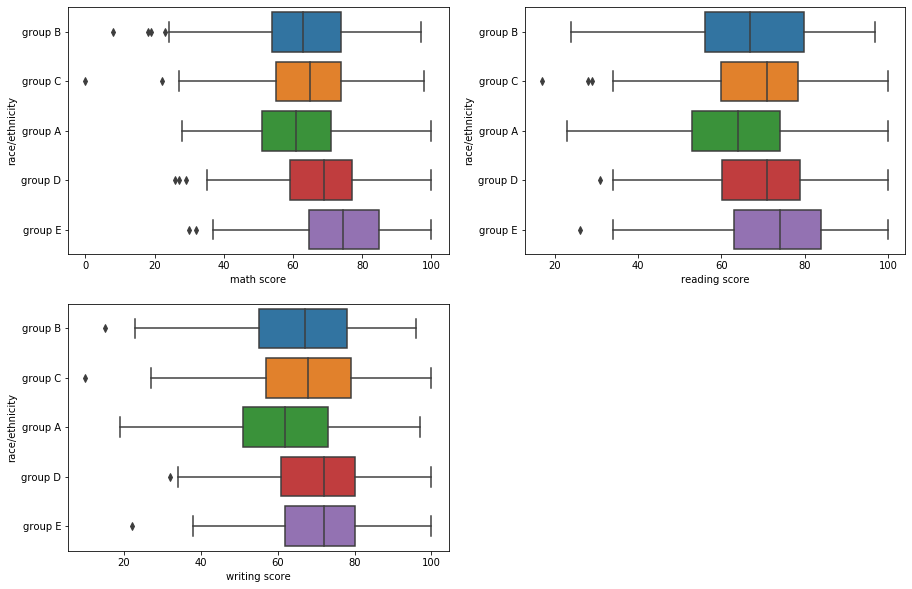

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="race/ethnicity", data=df)

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="race/ethnicity", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="race/ethnicity", data=df)

## mathscore
- > Students belonging to group A performed a little poor than the others. Group E students performed well.

## readingscore
- > Students belonging to group A performed poor than the others. Group E students performed well.

## writingscore
- > Students from all groups performed almost similar. Group A students lagged a little.

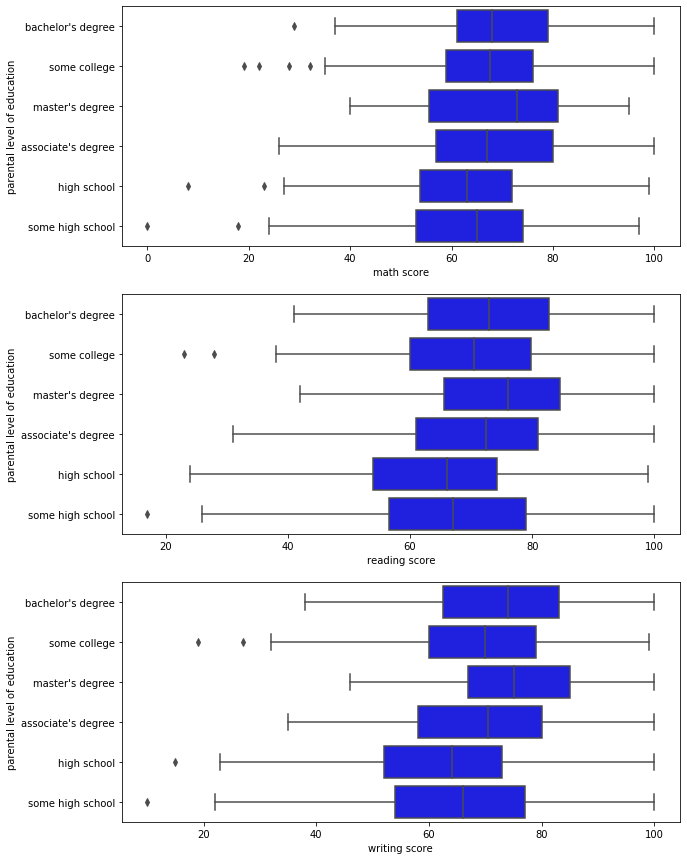

In [15]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.boxplot(x="math score",y="parental level of education", data=df,color='blue')

plt.subplot(3,1,2)
sns.boxplot(x="reading score",y="parental level of education", data=df,color='blue')

plt.subplot(3,1,3)
sns.boxplot(x="writing score",y="parental level of education", data=df,color='blue')

## mathscore
- > Students whose parents had "Bachelor's Degree","Master's Degree" and "Assosciate's Degree" performed better than others
- > Students whose parents had education- "Some college" performed better than students whose parents had education- "high school" and "some high school"

## readingscore
- > Students whose parents had "Bachelor's Degree",and "Master's Degree" performed better than others
- > Students whose parents had "Some college","Assosciate's Degree" and "some high school" performed better than students whose parents had education- "high school"

## writingscore
- > Students whose parents had "Bachelor's Degree",and "Master's Degree" performed better than others
- > Students whose parents had "Assosciate's Degree","Some college" and "some high school" performed better than students whose parents had education- "high school"

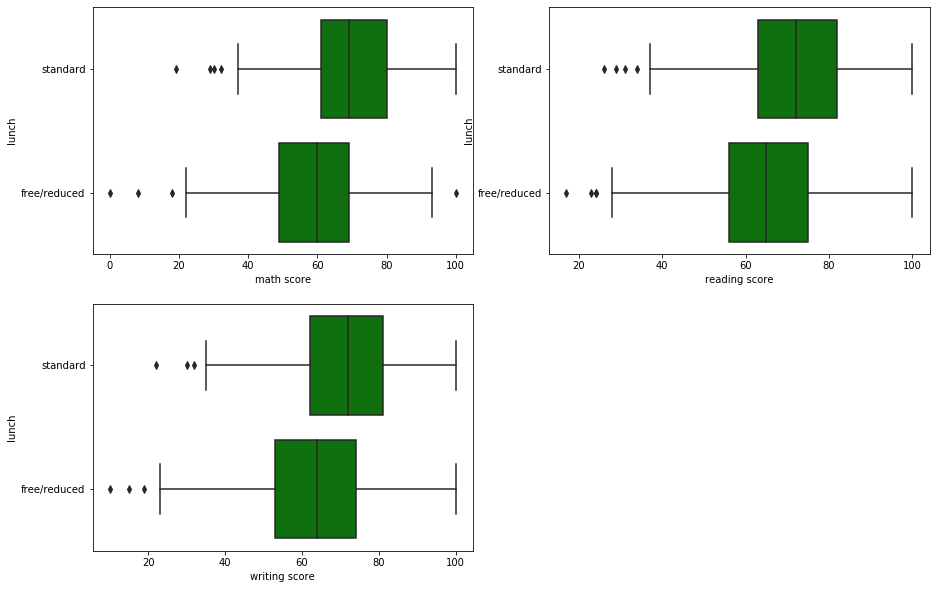

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="lunch", data=df,color='green')

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="lunch", data=df,color='green')

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="lunch", data=df,color='green')

- Students who had standard lunch performed better than those who had free/reduced lunch

- It is also notable that there are some students who peformed poor in both the caegories

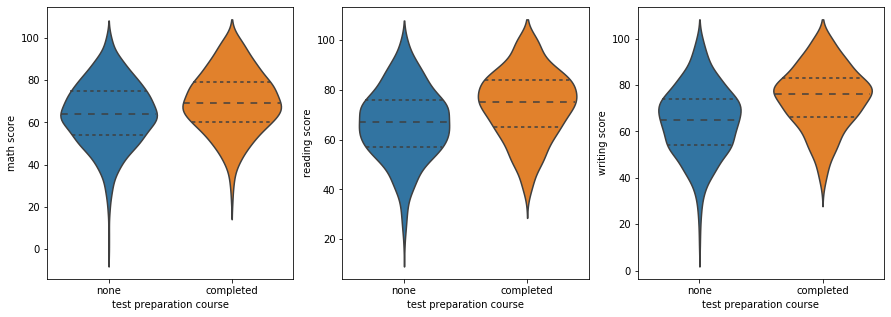

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.violinplot(x='test preparation course', y='math score', data=df,split=True, inner="quart")

plt.subplot(1,3,2)
sns.violinplot(x='test preparation course', y='reading score', data=df,split=True, inner="quart")

plt.subplot(1,3,3)
sns.violinplot(x='test preparation course', y='writing score', data=df,split=True, inner="quart")

- Students who completed Test Preparartion course have a minimum mark greater than those who didn't complete the test preparation course

- Regardless of the status of completion of the course, most of the students scored marks in the same range (60-80)

## Conclusion
- > Girls scored good in "reading and writing scores" whereas boys scored good in "mathscore"

- > Students from Group E perfomed well in all the three whereas Group A students lagged a little

- > Students whose parents had "Master's Degree" and "Bachelor's Degree" performed better, followed by students whose parents had "Assosciate's Degree" and then followed by students whose parents had "high school" education

- > But we can infer that "parental level of education" had a little less effect on "mathscores" than others

- > Students who had standard lunch performed better

- > Students who completed the Test Preparation Course scored a higher minimum mark. 

- > Test Preparation Course seems to have helped students from lifting up their minimum mark. 

- > Most of the students "regardless of the Test Preparation Course" scored in the range of 60-80 in all the three.